In [8]:
import numpy as np
import util
import StepLR
from newSoftmaxRegression import newSoftmaxRegression
from SoftmaxRegression import SoftmaxRegression 

## 1. Data Loading 

In [9]:
classification_train_data = util.load_data("./data/classification_train_data.pkl")
classification_train_label = util.load_data("./data/classification_train_label.pkl")
classification_test_data = util.load_data("./data/classification_test_data.pkl")

## 2. Data Exploration

In [10]:
print("Classification Train Data Shape:", classification_train_data.shape)
print("Classification Train Label Shape:", classification_train_label.shape)
print("Classification Test Data Shape:", classification_test_data.shape)

Classification Train Data Shape: (49976, 257)
Classification Train Label Shape: (49976, 2)
Classification Test Data Shape: (9997, 257)


## 3. Data Preprocessing

In [11]:
# remove index column
train_data_index = classification_train_data[:, 0]
train_label_index = classification_train_label[:, 0]
test_data_index = classification_test_data[:, 0]
classification_train_data = classification_train_data[:, 1:]
classification_train_label = classification_train_label[:, 1:].reshape(-1)
classification_test_data = classification_test_data[:, 1:]

In [12]:
classification_train_data.shape, classification_train_label.shape, classification_test_data.shape

((49976, 256), (49976,), (9997, 256))

In [13]:
train_data_index.shape, train_label_index.shape, test_data_index.shape

((49976,), (49976,), (9997,))

In [14]:
# normalization

# calculate the mean and standard deviation of each column
mean = np.mean(classification_train_data, axis=0)
std_dev = np.std(classification_train_data, axis=0)

# Z-Score normalizes each column
classification_train_data = (classification_train_data - mean) / std_dev
classification_test_data = (classification_test_data - mean) / std_dev

In [15]:
# label one-hot encoding
num_classes =  10 
classification_train_label = np.eye(num_classes)[classification_train_label]
print("train label shape:", classification_train_label.shape)

train label shape: (49976, 10)


## 4. Dataset Splitting

In [16]:
# divide the data set into training set and validation set
train_ratio = 0.8
seed = 123 #123
(train_data, train_labels), (validation_data, validation_labels) = util.split_train_validation(
    classification_train_data, classification_train_label,
    train_ratio=train_ratio, random_seed=seed
    )

In [17]:
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape

((39980, 256), (39980, 10), (9996, 256), (9996, 10))

# 5. Model

In [18]:
linear_model = SoftmaxRegression(
    num_classes=num_classes,
    learning_rate=0.18, # 0.1
    num_iterations=10000, # 10000
    random_seed=seed,
    )

In [19]:
np.exp(-2000 / 2000)*0.12

0.04414553294057308

In [20]:
0.1*(0.9995**5000)


0.0082033694431902

## 6. Train 

In [21]:
train_losses, val_losses, train_accuracies, val_accuracies = linear_model.fit(
    X_train=train_data, y_train=train_labels, 
    X_val=validation_data, y_val=validation_labels,
    decay_rate=0.9995
    )

  0%|          | 1/10000 [00:00<22:31,  7.40it/s]

100%|██████████| 10000/10000 [08:58<00:00, 18.58it/s]


In [22]:
# util.plot_loss_curves(train_losses=train_losses, val_losses=val_losses)

In [23]:
train_accuracies[-1], val_accuracies[-1]

(0.5296148074037018, 0.5109043617446979)

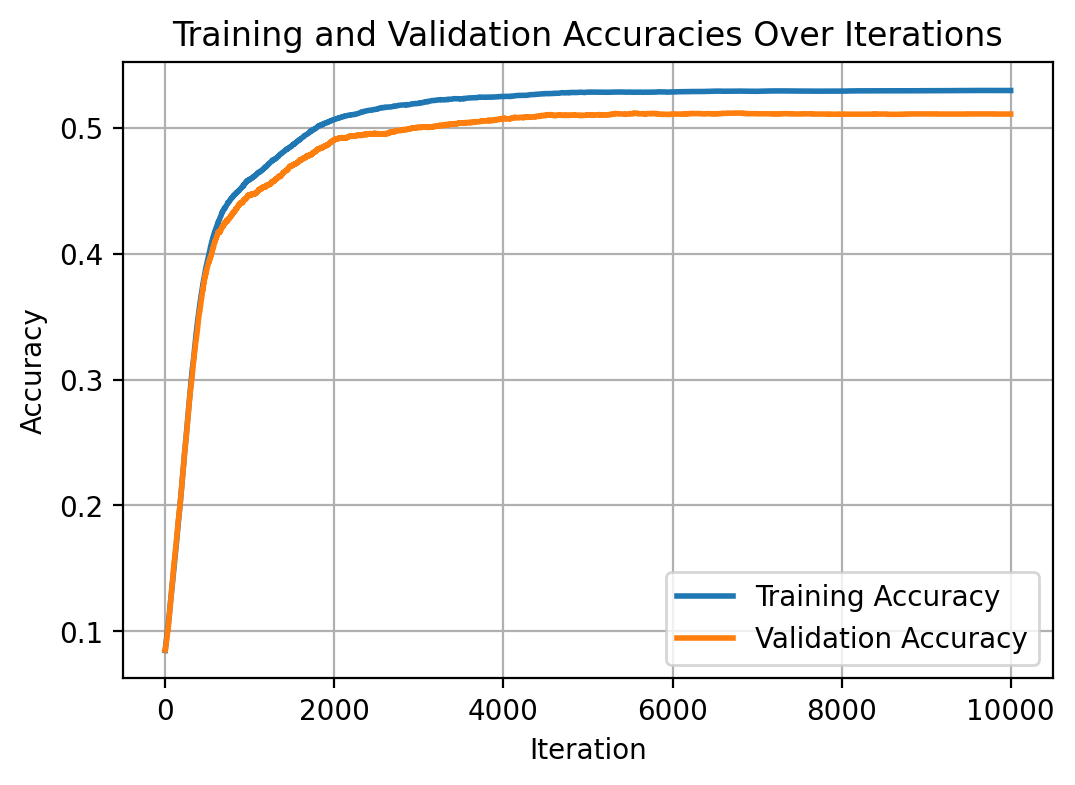

In [24]:
util.plot_acc_curves(train_acc=train_accuracies, val_acc=val_accuracies)

## 7. Predict

In [25]:
test_label_predict = linear_model.predict(classification_test_data)

In [26]:
# merge index and corresponding classification results 
submit_data = np.hstack((
    test_data_index.reshape(-1, 1),
    test_label_predict.reshape(-1, 1)
    ))

In [27]:
submit_data.shape

(9997, 2)

In [28]:
util.save_data('./classification_results.pkl', submit_data)

Saved successfully
